<a href="https://colab.research.google.com/github/XiekangZhang/AI_Framework/blob/master/Customization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Customization basics: tensors and operations

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

## Tensors:
A Tensor is a multi-dimensional array. Similar to NumPy ndarray objects.

The most obvious differences between NumPy arrays and tf.Tensor are:
1. Tensors can be backed by accelerator memory
2. Tensors are immutable

In [0]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In [0]:
# each tf.Tensor has a shape and a datatype
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


##1.1. NumPy Compatibility

TensorFlow operations automatically convert NumPy ndarrays to Tensors.

NumPy operations automatically convert Tensors to NumPy ndarrays.

In [0]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


##1.2. GPU acceleration

In [0]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[]
Is the Tensor on GPU #0:  
False


In [0]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.experimental.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 391.38ms


In [0]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

# Create a CSV file
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
  f.write("""Line 1
Line 2
Line 3
  """)

ds_file = tf.data.TextLineDataset(filename)

In [0]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

In [0]:
print('Elements of ds_tensors:')
for x in ds_tensors:
  print(x)

print('\nElements in ds_file:')
for x in ds_file:
  print(x)

Elements of ds_tensors:
tf.Tensor([4 1], shape=(2,), dtype=int32)
tf.Tensor([16 25], shape=(2,), dtype=int32)
tf.Tensor([ 9 36], shape=(2,), dtype=int32)

Elements in ds_file:
tf.Tensor([b'Line 1' b'Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'Line 3' b'  '], shape=(2,), dtype=string)


#2. Custom layers

In [0]:
%tensorflow_version 2.x
!pip install -q tf-nightly
import tensorflow as tf

     |████████████████████████████████| 517.6MB 33kB/s 
     |████████████████████████████████| 460kB 36.8MB/s 
     |████████████████████████████████| 3.0MB 40.3MB/s 


In [0]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


##2.1. Layers: Common sets of useful operations

In [0]:
# In the tf.keras.layers package, layers are objects. To construct a layer,
# simply construct the object. Most layers take as a first argument the number
# of output dimensions / channels.
layer = tf.keras.layers.Dense(100)
# The number of input dimensions is often unnecessary, as it can be inferred
# the first time the layer is used, but it can be provided if you want to
# specify it manually, which is useful in some complex models.
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [0]:
# To use a layer, simply call it.
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [0]:
# Layers have many useful methods. For example, you can inspect all variables
# in a layer using `layer.variables` and trainable variables using
# `layer.trainable_variables`. In this case a fully-connected layer
# will have variables for weights and biases.
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.32253557, -0.09693527,  0.2785101 ,  0.44415218,  0.03078675,
         -0.09251082, -0.3416068 , -0.10755807,  0.54424375, -0.4934789 ],
        [ 0.06511873, -0.06638962, -0.5949699 ,  0.07507068,  0.4579144 ,
         -0.06539047, -0.46398455, -0.23047036,  0.5333087 ,  0.22995389],
        [ 0.2165451 ,  0.27641958,  0.4754551 ,  0.5080299 , -0.08098447,
         -0.6072552 ,  0.19137704,  0.03101659, -0.2381927 , -0.6073065 ],
        [ 0.5285973 ,  0.3634457 , -0.27236336,  0.3228631 ,  0.6161751 ,
          0.04906797, -0.21174264,  0.19664758,  0.50729257,  0.2007168 ],
        [ 0.26367038, -0.3221969 , -0.2729261 ,  0.3663113 , -0.41304874,
          0.06025416, -0.15315834, -0.23136184, -0.28046104,  0.16676736]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [0]:
# The variables are also accessible through nice accessors
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.32253557, -0.09693527,  0.2785101 ,  0.44415218,  0.03078675,
         -0.09251082, -0.3416068 , -0.10755807,  0.54424375, -0.4934789 ],
        [ 0.06511873, -0.06638962, -0.5949699 ,  0.07507068,  0.4579144 ,
         -0.06539047, -0.46398455, -0.23047036,  0.5333087 ,  0.22995389],
        [ 0.2165451 ,  0.27641958,  0.4754551 ,  0.5080299 , -0.08098447,
         -0.6072552 ,  0.19137704,  0.03101659, -0.2381927 , -0.6073065 ],
        [ 0.5285973 ,  0.3634457 , -0.27236336,  0.3228631 ,  0.6161751 ,
          0.04906797, -0.21174264,  0.19664758,  0.50729257,  0.2007168 ],
        [ 0.26367038, -0.3221969 , -0.2729261 ,  0.3663113 , -0.41304874,
          0.06025416, -0.15315834, -0.23136184, -0.28046104,  0.16676736]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

##2.2. Implementing custom layers

The best way to implement your own layer is extending the tf.keras.Layer class and implementing:
1. __init__: for input independent initialization
2. build: shapes of the input tensors and do the rest of the initialization
3. call: forward computation

In [0]:
# Test
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    self.kernel = self.add_weight('kernel', shape=[int(input_shape[-1]), self.num_outputs])

  def call(self, input):
    return tf.matmul(input, self.kernel)

layer = MyDenseLayer(10)

In [0]:
_ = layer(tf.zeros([10, 5]))

In [0]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer/kernel:0']


##2.3. Models: Composing layers

In [0]:
class ResnetIdentityBlock(tf.keras.Model):
  def __init__(self, kernel_size, filters):
    super(ResnetIdentityBlock, self).__init__(name='')
    filters1, filters2, filters3 = filters

    self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
    self.bn2a = tf.keras.layers.BatchNormalization()

    self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn2b = tf.keras.layers.BatchNormalization()

    self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn2c = tf.keras.layers.BatchNormalization()

  def call(self, input_tensor, training=False):
    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2c(x)
    x = self.bn2c(x, training=training)

    x += input_tensor
    return tf.nn.relu(x)


block = ResnetIdentityBlock(1, [1, 2, 3])

In [0]:
_ = block(tf.zeros([1, 2, 3, 3])) 

In [0]:
block.layers

In [0]:
len(block.variables)

18

In [0]:
block.summary()

Model: "resnet_identity_block"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  4         
_________________________________________________________________
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4         
_________________________________________________________________
batch_normalization_1 (Batch multiple                  8         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  9         
_________________________________________________________________
batch_normalization_2 (Batch multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
________________________________________________

In [0]:
# use Sequential instead
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1),
                                                    input_shape=(
                                                        None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,
                                                    padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [0]:
my_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, None, None, 1)     4         
_________________________________________________________________
batch_normalization_3 (Batch (None, None, None, 1)     4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 2)     4         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, None, 2)     8         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 3)     9         
_________________________________________________________________
batch_normalization_5 (Batch (None, None, None, 3)     12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
___________________________________________________________

#3. Automatic differentiation and gradient tape

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
# Gradient tapes
x = tf.ones((2, 2))

with tf.GradientTape() as t:
  t.watch(x)
  y = tf.reduce_sum(x)
  z = tf.multiply(y, y)

# Derivative of z with respect to the original input tensor x
dz_dx = t.gradient(z, x)
for i in [0, 1]:
  for j in [0, 1]:
    assert dz_dx[i][j].numpy() == 8.0

In [0]:
x = tf.ones((2, 2))

with tf.GradientTape() as t:
  t.watch(x)
  y = tf.reduce_sum(x)
  z = tf.multiply(y, y)

# Use the tape to compute the derivative of z with respect to the
# intermediate value y.
dz_dy = t.gradient(z, y)
assert dz_dy.numpy() == 8.0

In [0]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
  t.watch(x)
  y = x * x
  z = y * y
dz_dx = t.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = t.gradient(y, x)  # 6.0
del t  # Drop the reference to the tape

In [0]:
# Recording control flow
def f(x, y):
  output = 1.0
  for i in range(y):
    if i > 1 and i < 5:
      output = tf.multiply(output, x)
  return output

def grad(x, y):
  with tf.GradientTape() as t:
    t.watch(x)
    out = f(x, y)
  return t.gradient(out, x)

x = tf.convert_to_tensor(2.0)

assert grad(x, 6).numpy() == 12.0
assert grad(x, 5).numpy() == 12.0
assert grad(x, 4).numpy() == 4.0

In [0]:
# Higher-order gradients
x = tf.Variable(1.0)  # Create a Tensorflow variable initialized to 1.0

with tf.GradientTape() as t:
  with tf.GradientTape() as t2:
    y = x * x * x
  # Compute the gradient inside the 't' context manager
  # which means the gradient computation is differentiable as well.
  dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

assert dy_dx.numpy() == 3.0
assert d2y_dx2.numpy() == 6.0

#4. Custom Training: basics



In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [0]:
# Variables

# Using Python state
x = tf.zeros([10, 10])
x += 2  # This is equivalent to x = x + 2, which does not mutate the original
        # value of x
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [0]:
v = tf.Variable(1.0)
# Use Python's `assert` as a debugging statement to test the condition
assert v.numpy() == 1.0

# Reassign the value `v`
v.assign(3.0)
assert v.numpy() == 3.0

# Use `v` in a TensorFlow `tf.square()` operation and reassign
v.assign(tf.square(v))
assert v.numpy() == 9.0

##4.1. Fit a linear model

f(x) = x*W+b

In [0]:
# Define the model
class Model(object):
  def __init__(self):
    # W = 5.0, and b = 0.0
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()
assert model(3.0).numpy() == 15.0


In [0]:
# Define a loss function
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

In [0]:
# Obtain training data
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

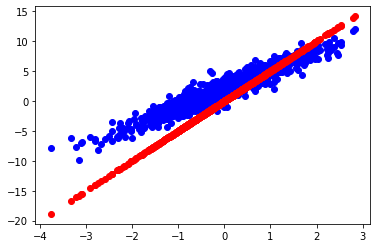

Current loss: 9.194250


In [0]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [0]:
# Define a training loop
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=9.19425
Epoch  1: W=4.58 b=0.41, loss=6.12656
Epoch  2: W=4.25 b=0.74, loss=4.20540
Epoch  3: W=3.99 b=0.99, loss=3.00218
Epoch  4: W=3.79 b=1.20, loss=2.24853
Epoch  5: W=3.63 b=1.36, loss=1.77644
Epoch  6: W=3.50 b=1.49, loss=1.48069
Epoch  7: W=3.40 b=1.60, loss=1.29540
Epoch  8: W=3.32 b=1.68, loss=1.17931
Epoch  9: W=3.26 b=1.75, loss=1.10656


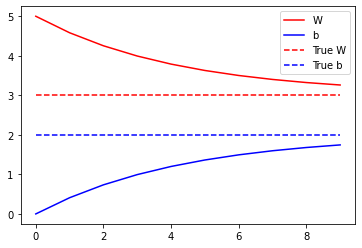

In [0]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(outputs, model(inputs))

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

#Exkurs: quickstart for experts

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# tf.data to batch and shuffle the dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
# build tf.keras model 
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  # Connection of each pre-defined layers
  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
# tf.GradientTape
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference e.g. Dropout
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
# Test the model:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [9]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result() * 100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.13444013893604279, Accuracy: 95.9816665649414, Test Loss: 0.07373812049627304, Test Accuracy: 97.55999755859375
Epoch 2, Loss: 0.04217809811234474, Accuracy: 98.72999572753906, Test Loss: 0.05328383669257164, Test Accuracy: 98.18999481201172
Epoch 3, Loss: 0.022748246788978577, Accuracy: 99.20500183105469, Test Loss: 0.0683184489607811, Test Accuracy: 98.0199966430664
Epoch 4, Loss: 0.0125509575009346, Accuracy: 99.54499816894531, Test Loss: 0.06341845542192459, Test Accuracy: 98.269996

#5. Custom training: walkthrough

Build a model, train a model and make predictions

1. Import and parse the dataset
2. Select the type of model
3. Train the model
4. Evaluate the model's effectiveness
5. Use the trained model to make predictions

TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later. This makes it easy to get started with TensorFlow and debug models, and it reduces boilerplate as well.

In [11]:
%tensorflow_version 2.x
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print('TensorFlow version: {}'.format(tf.__version__))
print('Eager execution: {}'.format(tf.executing_eagerly()))

TensorFlow version: 2.2.0-rc2
Eager execution: True


##5.1. Import and parse the training dataset

In [12]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [13]:
# Inspect the data
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [14]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print('Features: {}'.format(feature_names))
print('Label: {}'.format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [0]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

##5.2. Create a tf.data.Dataset

In [0]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names = column_names,
    label_name=label_name,
    num_epochs=1
)

In [17]:
# Dataset objects are iterable --> {'feature_name': value}
features, labels = next(iter(train_dataset))
print(features)
# change the batch_size to set the number of examples stored in these feature arrays

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.1, 6.7, 6.3, 6.1, 4.5, 5.1, 6.6, 5.5, 7.7, 6.2, 4.8, 6.5, 6. ,
       5. , 6.2, 6.9, 5.7, 6.3, 4.7, 4.9, 5.1, 7.4, 7.7, 4.6, 6.1, 6.8,
       5.7, 5. , 5.6, 6.4, 5.1, 6. ], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3. , 3. , 3.3, 2.8, 2.3, 2.5, 3. , 2.4, 2.6, 2.8, 3. , 3. , 2.7,
       2. , 2.2, 3.2, 2.8, 3.4, 3.2, 2.4, 3.8, 2.8, 2.8, 3.6, 2.6, 3.2,
       3. , 3.6, 2.5, 2.8, 3.8, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.9, 5. , 6. , 4.7, 1.3, 3. , 4.4, 3.7, 6.9, 4.8, 1.4, 5.5, 5.1,
       3.5, 4.5, 5.7, 4.5, 5.6, 1.3, 3.3, 1.5, 6.1, 6.7, 1. , 5.6, 5.9,
       4.2, 1.4, 3.9, 5.6, 1.6, 4.8], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 1.7, 2.5, 1.2, 0.3, 1.1, 1.4, 1. , 2.3, 1.8, 0.1, 1.8, 1.6,
       1. , 1.5, 2.3, 1.3, 2.4, 0.2, 1. , 0.3, 1.9, 2. , 0.2,

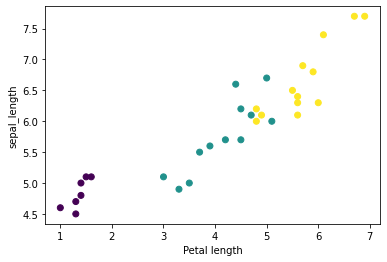

In [18]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.show()

In [0]:
# To simplify the model building step, create a function to repackage the 
# features dictionary into a single array with shape: (batch_size, num_features)
# tf.stack --> take a list of tensors to tensor with dimension

def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [0]:
# tf.data.Dataset map method to pack the features of each 
# (features, label) pair into the training dataset
train_dataset = train_dataset.map(pack_features_vector)

In [27]:
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[5.9 3.  5.1 1.8]
 [5.6 2.9 3.6 1.3]
 [4.4 3.  1.3 0.2]
 [6.  2.2 5.  1.5]
 [5.1 3.8 1.6 0.2]], shape=(5, 4), dtype=float32)


##5.3. Select the type of model

A model is a relationship between features and the label. The prediction is called inference, when a trained model is used for prediction of unlabeled examples. 

In [0]:
# Create a model using Keras
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)                        
])
# ReLU is common for hidden layers.

###5.3.1. Using the model

In [30]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.04280728,  1.9930058 ,  2.1956296 ],
       [ 0.3969079 ,  1.8748081 ,  1.9613539 ],
       [ 0.45570868,  1.3793486 ,  1.4776508 ],
       [-0.04037309,  1.8772553 ,  1.9469523 ],
       [ 0.4770029 ,  1.6108403 ,  1.7409935 ]], dtype=float32)>

In [31]:
# Each example returns a logit for each class
# The vector of raw predictions that a classification model generates, which is 
# ordinarily then passed to a normalization function. 
# a multi-class classification --> softmax function
# logits sometimes refer to the element-wise inverse of the sigmoid function

tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.06009903, 0.42250115, 0.51739985],
       [0.09838881, 0.4313101 , 0.4703011 ],
       [0.15880509, 0.39994127, 0.4412536 ],
       [0.06622168, 0.45062536, 0.48315296],
       [0.13076891, 0.4063721 , 0.46285897]], dtype=float32)>

In [32]:
# Taking the tf.argmax across classes gives us the predicted class index
print('Prediction: {}'.format(tf.argmax(predictions, axis=1)))
print('Label: {}'.format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Label: [2 1 0 2 0 2 1 1 0 0 1 0 2 1 0 0 2 2 0 2 0 0 0 1 1 1 2 0 0 2 2 0]


##5.4. Train the model

In [0]:
# Define the loss and gradient function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [34]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference e.g. Dropout.
  y_ = model(x, training=training)
  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print('Loss test: {}'.format(l))

Loss test: 1.2718327045440674


In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

###5.4.1. Create an optimizer

learning_rate sets the step size to take for each iteration down the hill. This is a hyperparameter that you'll commonly adjust to achieve better result. 

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [37]:
loss_value, grads = grad(model, features, labels)
print('Step: {}, Initial Loss: {}'.format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print('Step: {}, Loss: {}'.format(optimizer.iterations.numpy(),
                                  loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.2718327045440674
Step: 1, Loss: 1.2108668088912964


###5.4.2. Training loop

1. Iterate each epoch. An epoch is one pass through the dataset.
2. Within an epoch, iterate over each example in the training Dataset grabbing its features (x) and label (y).
3. Using the example's features, make a prediction and compare it with the label. Measure the inaccuracy of the prediction and use that to calculate the model's loss and gradients. 
4. Use an optimizer to update the model's variables.
5. Keep track of some stats for visualization. 
6. Repeat for each epoch. 

num_epochs is a hyperparameter that you can tune. Choosing the right number usually requires both experience and experimentation. 

In [41]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value) # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inferece (e.g. Dropout). 
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print('Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}'.format(
        epoch, epoch_loss_avg.result(), epoch_accuracy.result())
    )

Epoch 000: Loss: 0.911, Accuracy: 42.500%
Epoch 050: Loss: 0.413, Accuracy: 90.833%
Epoch 100: Loss: 0.247, Accuracy: 96.667%
Epoch 150: Loss: 0.170, Accuracy: 97.500%
Epoch 200: Loss: 0.137, Accuracy: 97.500%


##5.5. Visualize the loss function over time

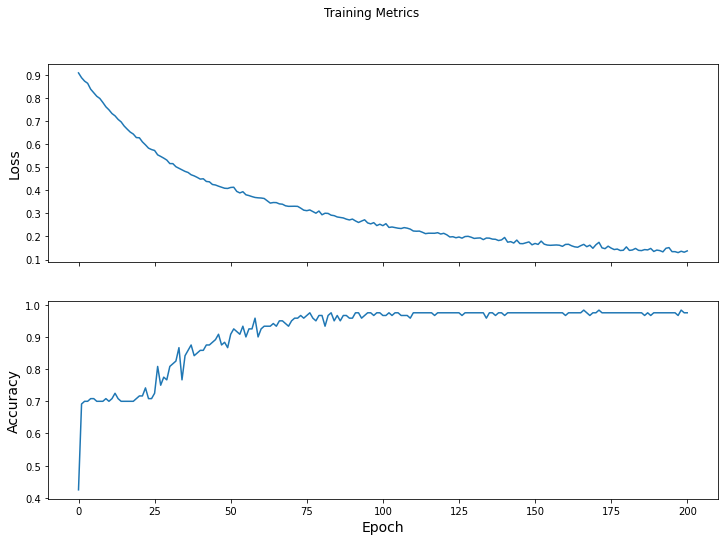

In [42]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel('Loss', fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel('Accuracy', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

##5.6. Evaluate the model's effectiveness

In [43]:
# Setup the test dataset
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [45]:
# Evaluate the model on the test dataset
# the model only evaluates a single epoch of the test data
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print('Test set accuracy: {:.3%}'.format(test_accuracy.result()))

Test set accuracy: 96.667%


In [47]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

##5.7. Use the trained model to make predictions

In [48]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]                                    
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.5%)
Example 1 prediction: Iris versicolor (89.6%)
Example 2 prediction: Iris virginica (74.4%)
